In [1]:
import os, sys
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilibs as ul

In [2]:
timepoints = pd.read_csv(r"D:\PPMI_UA_2021\Database\timepoints.csv")
source = r"D:\PPMI_UA_2021\Flight Data"

In [3]:
storage = {}
disp = [i*250 for i in range(15)]
for ifile, file in enumerate(timepoints.fname.tolist()):
    if ifile in disp:
        print(f"{ifile:4.0f}  ... {file} ...")
    idx1 = int(timepoints.tp114.iloc[ifile])
    idx2 = int(timepoints.tp115.iloc[ifile])
    df = pd.read_csv(source + os.path.sep + file +str(".zip"),compression='zip')
    gs_dev_ddm =  ul.interpnan(df["gs_dev_ddm"][idx1-20:idx2+20])
    gs_dev_ddm = gs_dev_ddm.loc[idx1:idx2].to_numpy() 
    storage[file] = gs_dev_ddm
storage = pd.DataFrame(storage)
storage.to_csv(r"D:\PPMI_UA_2021\Database\gs_dev_ddm.csv", index=False)

   0  ... flight_10054 ...
 250  ... flight_13822 ...
 500  ... flight_17667 ...
 750  ... flight_20737 ...
1000  ... flight_24048 ...
1250  ... flight_29115 ...
1500  ... flight_32197 ...
1750  ... flight_35271 ...
2000  ... flight_39205 ...
2250  ... flight_42954 ...
2500  ... flight_46924 ...
2750  ... flight_50266 ...
3000  ... flight_54148 ...
3250  ... flight_57404 ...
3500  ... flight_61816 ...


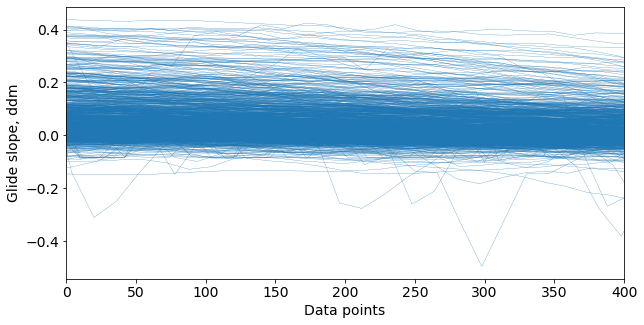

In [6]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\gs_dev_ddm.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy(), '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Glide slope, ddm", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\gs_dev_ddm.png")

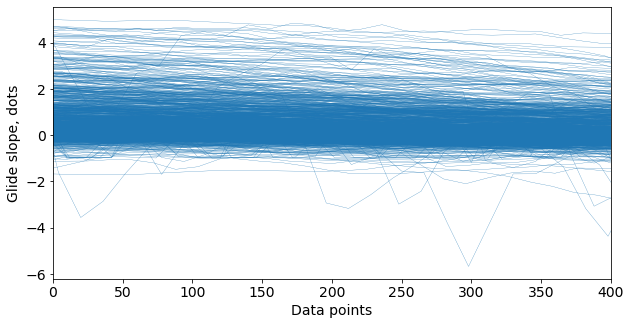

In [7]:
ddm_to_dot = 1./0.0875
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\gs_dev_ddm.csv")
fig, ax = plt.subplots(figsize=(10, 5))
for file in df.columns.tolist():
    ax.plot(df[file].to_numpy() * ddm_to_dot, '-', lw=0.25, color='#1f77b4')
ax.set_xlim([0, 400])
ax.set_ylabel("Glide slope, dots", fontsize=14)
ax.set_xlabel("Data points", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)

plt.savefig(r"D:\PPMI_UA_2021\gs_dev_dots.png")

In [4]:
df = pd.read_csv(r"D:\PPMI_UA_2021\Database\gs_dev_ddm.csv")
counter, sampling, duration = 0, 16, 5
max_gs_dev_dot = 1
ddm_to_dot = 1.0 / 0.0875
gs_dev_flag = []
for ifile, file in enumerate(df.columns.tolist()):
    gs_dev_dot = df[file].to_numpy() * ddm_to_dot
    for irow, _ in enumerate(gs_dev_dot):
        if irow >= gs_dev_dot.shape[0] - sampling * duration:
            gs_dev_flag.append(0)
            break
        else:
            flag = abs(gs_dev_dot[irow:irow + sampling * duration]) > max_gs_dev_dot
            if sum(flag) >= sampling * duration:
                gs_dev_flag.append(1)
                print(f"{ifile:4.0f} ... {file} ... Unstable")
                counter += 1
                break
sop_criteria = pd.read_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv")
sop_criteria["gs_dev"] = gs_dev_flag
sop_criteria.to_csv(r"D:\PPMI_UA_2021\Database\sop_criteria.csv", index=False)

   8 ... flight_10164 ... Unstable
   9 ... flight_10166 ... Unstable
  15 ... flight_10331 ... Unstable
  25 ... flight_10385 ... Unstable
  75 ... flight_11048 ... Unstable
  99 ... flight_11417 ... Unstable
 106 ... flight_11449 ... Unstable
 130 ... flight_11705 ... Unstable
 131 ... flight_11707 ... Unstable
 141 ... flight_11855 ... Unstable
 146 ... flight_11911 ... Unstable
 151 ... flight_12057 ... Unstable
 159 ... flight_12240 ... Unstable
 164 ... flight_12272 ... Unstable
 175 ... flight_12528 ... Unstable
 177 ... flight_12532 ... Unstable
 203 ... flight_13003 ... Unstable
 206 ... flight_13060 ... Unstable
 210 ... flight_13104 ... Unstable
 212 ... flight_13192 ... Unstable
 245 ... flight_13798 ... Unstable
 246 ... flight_13800 ... Unstable
 265 ... flight_14083 ... Unstable
 266 ... flight_14093 ... Unstable
 273 ... flight_14282 ... Unstable
 275 ... flight_14291 ... Unstable
 291 ... flight_14523 ... Unstable
 293 ... flight_14527 ... Unstable
 294 ... flight_1452

In [5]:
counter

315